# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

In [2]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1: Plot number of people by gender

In [3]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [4]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

M    2428
F     107
Name: gender, dtype: int64

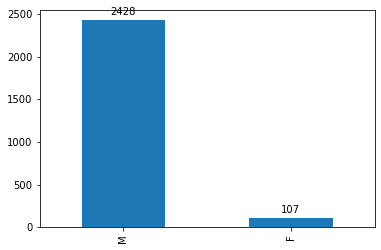

In [6]:
# with pandas
ax=kill.gender.value_counts().plot.bar()
for i in ax.containers:
    ax.bar_label(i, padding=3)

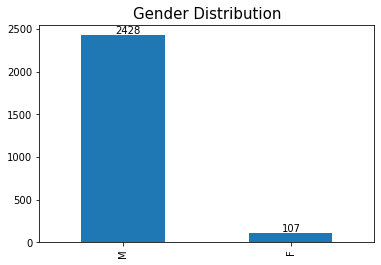

In [ ]:
# with pandas

fig, ax = plt.subplots()


In [7]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

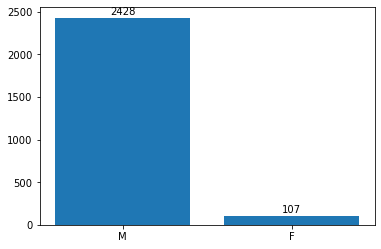

In [8]:
x = list(kill.gender.value_counts().index)
y = list(kill.gender.value_counts().values)
fig, ax = plt.subplots()
ax.bar(x,y)
for i in ax.containers:
    ax.bar_label(i, padding=1 )

# for p in ax.patches:
#     ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20), fontsize= 10);

[Text(0, 3, '2428'), Text(0, 3, '107')]

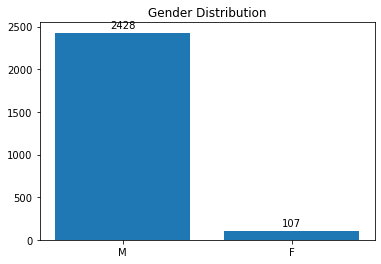

In [9]:
# with matplotlib
fig, ax = plt.subplots()
ax.set_title("Gender Distribution")
a = ax.bar(x=kill.gender.unique(), height =kill.gender.value_counts())
ax.bar_label(a, padding=3)


# or

# genders = kill.groupby("gender").sum().index
# fig, ax = plt.subplots()
# ax.bar(genders, kill.gender.value_counts())
# ax.bar_label(ax.containers[0])
# ax.set_title("Gender Distribution")

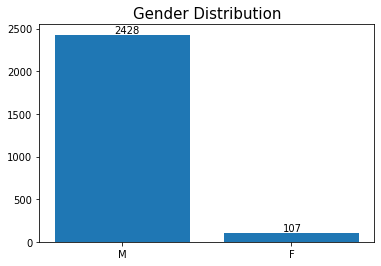

In [ ]:
# with matplotlib
fig, ax = plt.subplots()



## 2: Plot 7 most common kill weapons

In [10]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [11]:
common_weapons = kill.armed.value_counts()[:7]
common_weapons

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [12]:
guns = list(common_weapons.index)
guns

['gun', 'knife', 'vehicle', 'unarmed', 'undetermined', 'toy weapon', 'machete']

In [ ]:
common_weapons =                [:7]
common_weapons

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

In [13]:
counts =list(common_weapons.values)
counts

[1398, 373, 177, 171, 117, 104, 18]

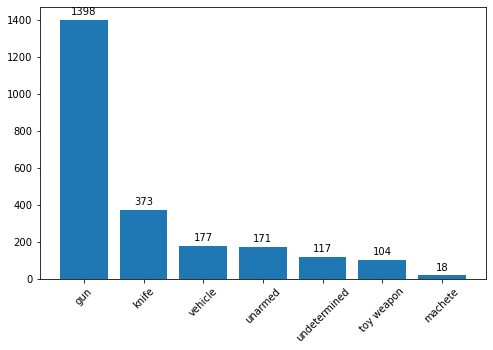

In [14]:
# with matplotlib

fig, ax = plt.subplots(figsize=(8,5))
a = ax.bar(guns, counts);
ax.bar_label(a, padding=3)
ax.set_xticks(guns)
ax.set_xticklabels(guns, rotation=45);

# ax.tick_params(axis="x", labelrotation=45)

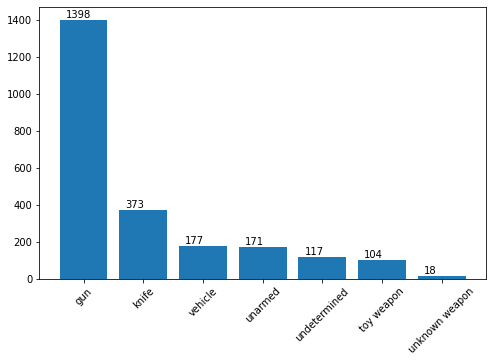

In [ ]:
# with matplotlib

fig, ax = plt.subplots(figsize=(8,5))
ax.
ax.



## 3: Plot number of age of killed people under three groups : Under 25 and Above 25, others

In [15]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [16]:
kill[kill.age >= 25].shape

(2008, 14)

In [17]:
kill.age.isnull().sum()

77

In [18]:
kill["age_cat"] = kill.age.apply(lambda x : "above25" if x >= 25 else ( "below25" if x<25 else "others" ))
kill.age_cat

0       above25
1       above25
2       below25
3       above25
4       above25
         ...   
2530    above25
2531     others
2532    above25
2533    above25
2534    above25
Name: age_cat, Length: 2535, dtype: object

In [ ]:
kill["age_cat"] = kill.age.apply(------------------------------)

In [19]:
age_class = kill.age_cat.value_counts()
age_class

above25    2008
below25     450
others       77
Name: age_cat, dtype: int64

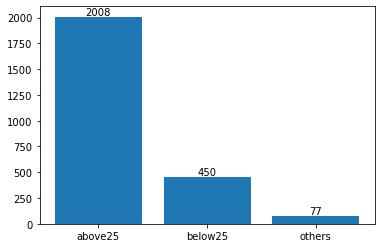

In [20]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(list(age_class.index), list(age_class.values))
ax.bar_label(ax.containers[0])
plt.show()

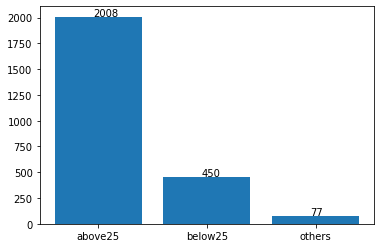

In [ ]:
# with matplotlib
fig, ax = plt.subplots()




## 4: Plot number of killed poeple by race

In [21]:
race_freq = kill.race.value_counts()
race_freq

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [22]:
races_count=list(race_freq)
races_count

[1201, 618, 423, 39, 31, 28]

In [23]:
races = list(race_freq.index)
races

['W', 'B', 'H', 'A', 'N', 'O']

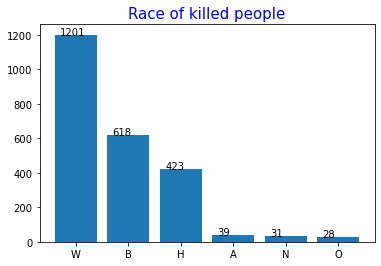

In [24]:
# with matplotlib
fig, ax = plt.subplots()
ax.bar(races, races_count)
a = ax.set_title("Race of killed people", color="Blue", fontsize=15)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()))
    
plt.show()

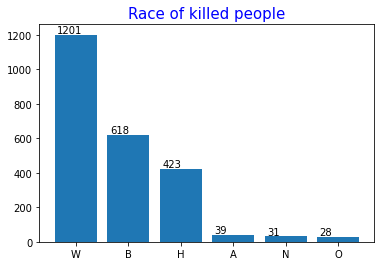

In [ ]:
# with matplotlib
fig, ax = plt.subplots()
ax.
ax.



## 5: Killed People According to Races (Pie Chart)

In [25]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25


In [26]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [27]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [28]:
kill.shape

(2535, 15)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [29]:
kill.race.value_counts(dropna=False)

W      1201
B       618
H       423
NaN     195
A        39
N        31
O        28
Name: race, dtype: int64

In [30]:
labels=kill.race.value_counts().index
labels

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [31]:
sizes=kill.race.value_counts().values
sizes

array([1201,  618,  423,   39,   31,   28], dtype=int64)

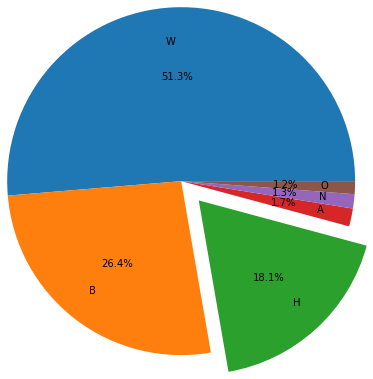

In [38]:
plt.pie(x = sizes, labels=labels, radius=2, labeldistance=0.8, autopct="%.1f%%",  explode= [0,0,0.3,0,0,0]);

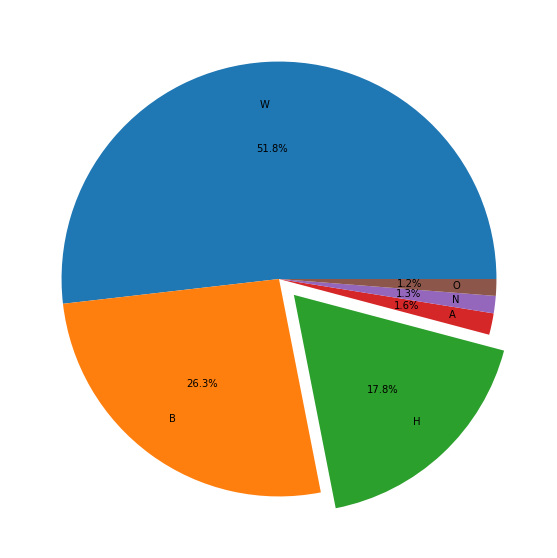